
# Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a regression activity.

## Workflow
1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Data preparation, according to background information
    1. Set the __target__ variable, according to background information
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [164]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

## Load the dataset from a `.csv` file and show a short description

In [165]:
df=pd.read_csv("https://pokelab.ddns.net/datasets/regression_example.csv")
df.head()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
0,0,1.509081,-1.049118,1.978885,1.060733,NaN,0.824655,0.819409,-1.157708,214.593802
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189


## Data Exploration and preparation

##### Show a short description of the columns

In [166]:
df.describe()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
count,843.000000,802.000000,807.000000,812.000000,8.020000e+02,805.000000,808.000000,806.000000,812.000000,813.000000
mean,421.000000,-0.037473,0.008466,-0.059965,9.616777e-01,-0.093113,0.034653,-0.019928,-0.034976,3.798356
std,243.497433,1.038115,0.973884,0.991280,1.286476e+00,1.050385,0.957238,0.997345,0.963010,114.189124
min,0.000000,-3.700229,-2.832440,-4.141473,2.007427e-08,-4.072767,-2.968219,-2.850505,-3.948627,-358.659591
25%,210.500000,-0.723630,-0.640017,-0.681924,8.725649e-02,-0.802553,-0.625219,-0.689671,-0.662887,-73.823652
50%,421.000000,-0.032953,0.005693,-0.050789,4.707895e-01,-0.090512,0.051123,-0.014592,-0.049392,-0.159154
75%,631.500000,0.629368,0.681480,0.587393,1.350123e+00,0.611545,0.689203,0.612939,0.614423,75.487094
max,842.000000,3.043062,2.945731,2.925432,9.200073e+00,3.024952,3.210373,2.861549,3.000174,422.794685


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [167]:
print("the number of rows with nulls is {}".format(df.shape[0]-df.dropna().shape[0]))

the number of rows with nulls is 273


#### Drop data that are useless or not usable

In [168]:
df.drop(inplace=True, columns="idx")

In [169]:
df.dropna(inplace=True)
df.head()

,F0,F1,F2,F3,F4,F5,F6,F7,response
1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
5,-0.635465,-1.112850,-0.330580,6.141348,1.914527,0.408895,-0.364722,-0.731382,-261.116572


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [170]:
target="response"
X=df.drop(columns=target)
y=df[target]

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

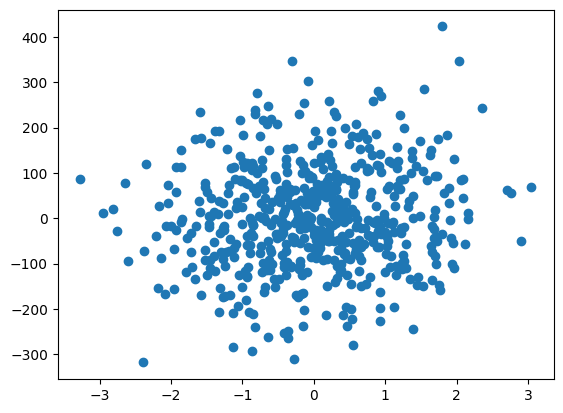

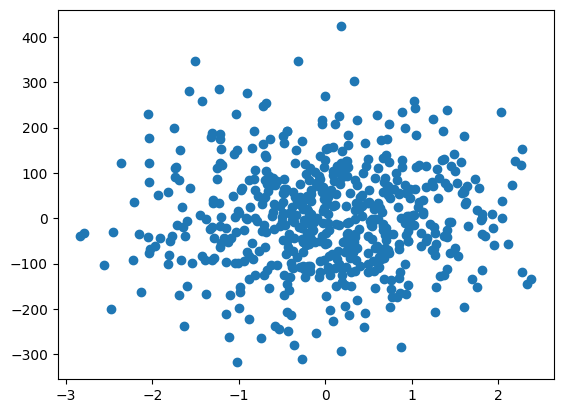

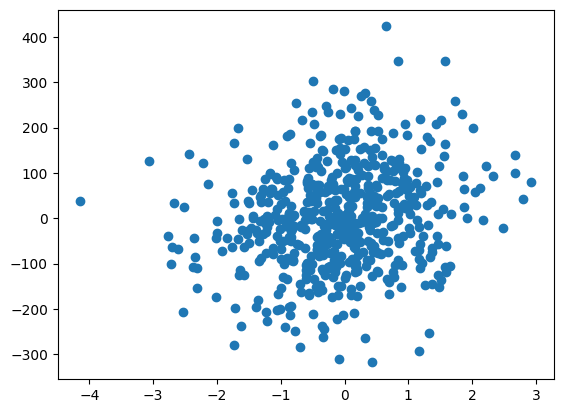

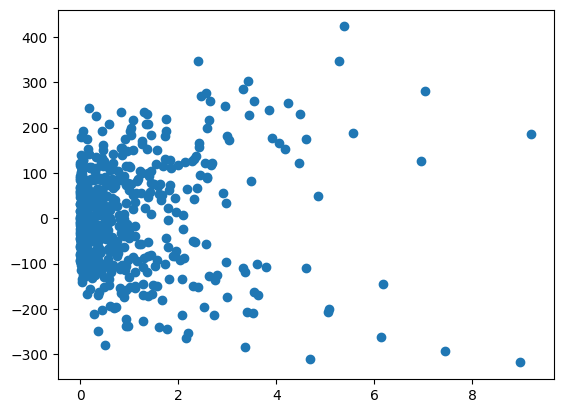

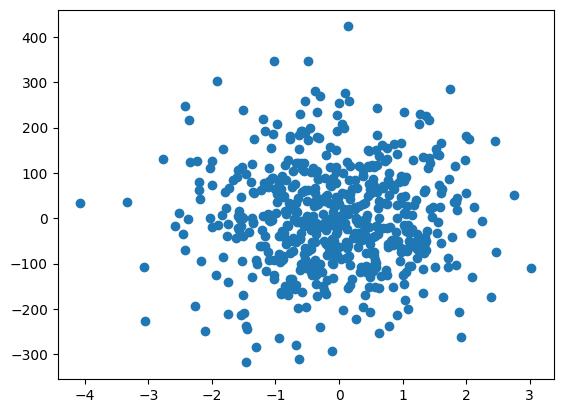

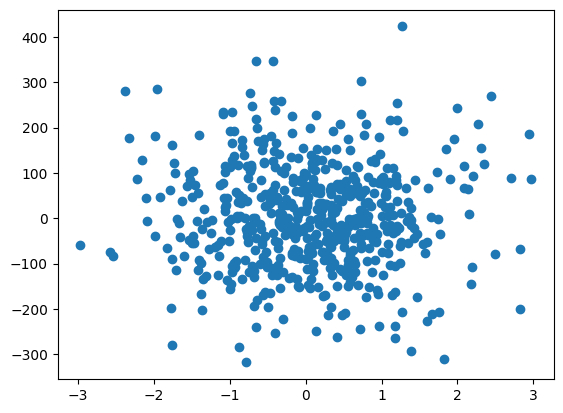

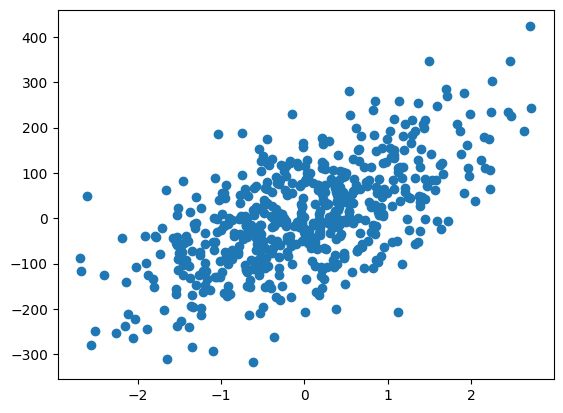

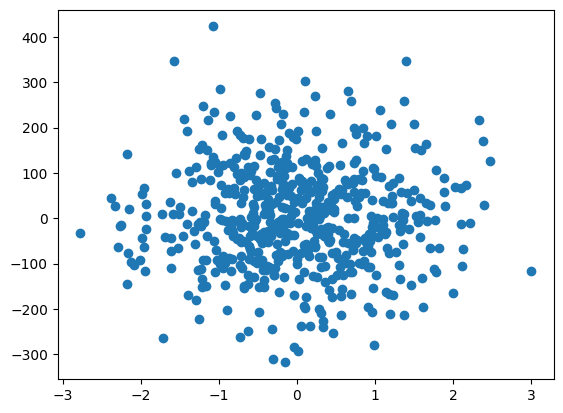

In [171]:
for feature in X.columns:
    plt.scatter(X[feature],y)
    plt.xlabel=feature
    plt.ylabel=target
    plt.show()

<Axes: >

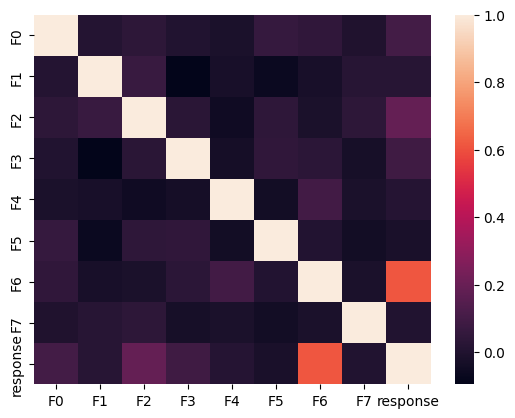

In [172]:
sns.heatmap(df.corr())

## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [173]:
random_state=42
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=random_state)


## 2. First experiment - univariate linear regression
We choose the variable exhibiting the highest correlation with respect to the target

Consider a reduced dataset containing the chosen variable and the target

In [174]:
lr=linear_model.LinearRegression()
best_feature="F6"
reduced_X_train=pd.DataFrame(X_train[best_feature])
reduced_X_test=pd.DataFrame(X_test[best_feature])


### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

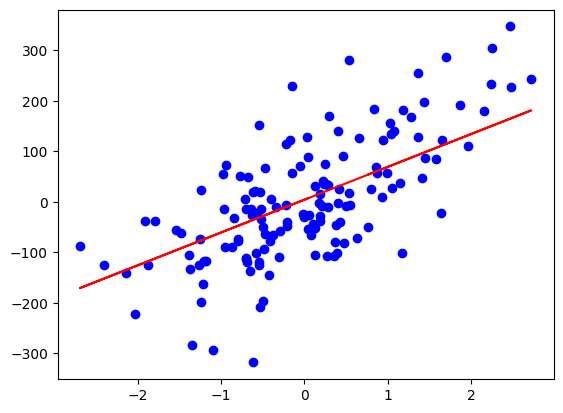

In [175]:
lr.fit(reduced_X_train,y_train)
y_pred=lr.predict(reduced_X_test)

# PRINTING PLOTS
plt.scatter(reduced_X_test,y_test,color="blue")
plt.plot(reduced_X_test,y_pred,color="red")

#### Compute the quality measures

In [176]:
print("the RMSE is {}".format(mean_squared_error(y_test,y_pred)))
print("the R2 is {}".format(r2_score(y_test,y_pred)))

the RMSE is 7955.209748336679
the R2 is 0.4587120729683919


## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [177]:
lr =linear_model.LinearRegression()


### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

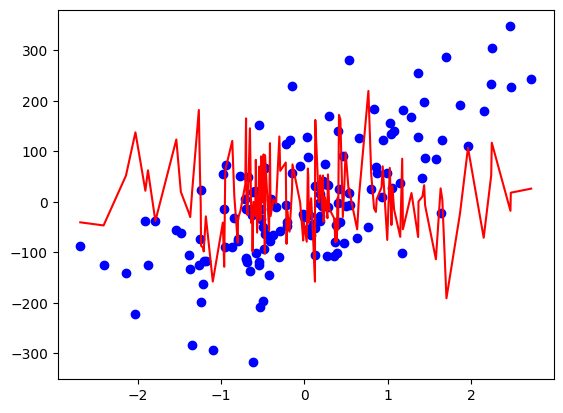

In [178]:
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
plt.scatter(X_test[best_feature],y_test,color="blue")
plt.plot(X_test.sort_values(by="F6").F6,y_pred,color="red")

#### Compute the quality measures

In [179]:
print("the RMSE is {}".format(mean_squared_error(y_test,y_pred)))
print("the R2 is {}".format(r2_score(y_test,y_pred)))

the RMSE is 7858.400674863807
the R2 is 0.46529915041269665


## Decision Tree Multivariate Regresson

In [180]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
dtr= DecisionTreeRegressor()


#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [181]:
dtr.fit(X_train,y_train)
print("the maximum depth is {}".format(dtr.get_depth()))


the maximum depth is 25


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [182]:
from sklearn.model_selection import GridSearchCV
parameters={"max_depth":range(1,dtr.get_depth()+1)}
gs=GridSearchCV(dtr,parameters)
gs.fit(X_train,y_train)
print(gs.best_estimator_)

DecisionTreeRegressor(max_depth=2)


In [183]:
dtr= DecisionTreeRegressor(max_depth=gs.best_params_["max_depth"])
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)


#### Show the tree

[Text(0.5, 0.8333333333333334, 'x[6] <= -0.522\nsquared_error = 12377.073\nsamples = 427\nvalue = 2.44'),
 Text(0.25, 0.5, 'x[6] <= -1.11\nsquared_error = 8299.766\nsamples = 135\nvalue = -71.894'),
 Text(0.125, 0.16666666666666666, 'squared_error = 8598.074\nsamples = 61\nvalue = -109.176'),
 Text(0.375, 0.16666666666666666, 'squared_error = 5963.634\nsamples = 74\nvalue = -41.162'),
 Text(0.75, 0.5, 'x[6] <= 0.966\nsquared_error = 10526.469\nsamples = 292\nvalue = 36.806'),
 Text(0.625, 0.16666666666666666, 'squared_error = 8203.058\nsamples = 224\nvalue = 13.971'),
 Text(0.875, 0.16666666666666666, 'squared_error = 10804.058\nsamples = 68\nvalue = 112.028')]

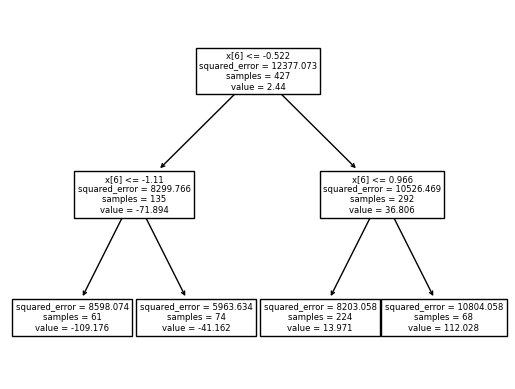

In [184]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
plot_tree(dtr)


## Random Forest Multivariate Regresson

In [185]:
# Create Random Forest regression object
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()


In [186]:
parameters={"max_depth":range(1,dtr.get_depth()+1)}
gs=GridSearchCV(rfr,parameters)
gs.fit(X_train,y_train)
print(gs.best_estimator_)

RandomForestRegressor(max_depth=2)


[Text(0.5, 0.8333333333333334, 'x[6] <= -0.522\nsquared_error = 12377.073\nsamples = 427\nvalue = 2.44'),
 Text(0.25, 0.5, 'x[6] <= -1.11\nsquared_error = 8299.766\nsamples = 135\nvalue = -71.894'),
 Text(0.125, 0.16666666666666666, 'squared_error = 8598.074\nsamples = 61\nvalue = -109.176'),
 Text(0.375, 0.16666666666666666, 'squared_error = 5963.634\nsamples = 74\nvalue = -41.162'),
 Text(0.75, 0.5, 'x[6] <= 0.966\nsquared_error = 10526.469\nsamples = 292\nvalue = 36.806'),
 Text(0.625, 0.16666666666666666, 'squared_error = 8203.058\nsamples = 224\nvalue = 13.971'),
 Text(0.875, 0.16666666666666666, 'squared_error = 10804.058\nsamples = 68\nvalue = 112.028')]

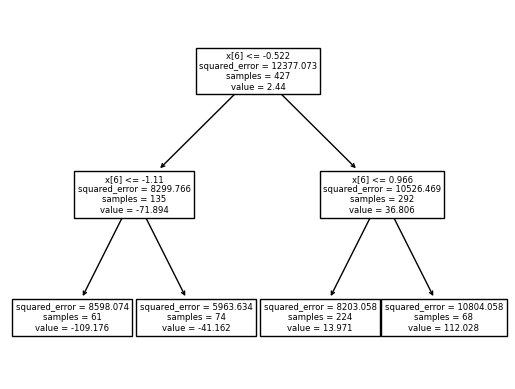

In [187]:
plot_tree(dtr)


### Plot the prediction of every model, compare it with the real test set, and print the metrics $R^2$ and RMSE 

In [193]:
models=[
    rdr := {
        "estimator":RandomForestRegressor()
    },
    lr:={
        "estimator":linear_model.LinearRegression()
    },
    dtr:={
        "estimator":DecisionTreeRegressor()
    }
]

8529.66607211548
0.4196249486177812
7858.400674863807
0.46529915041269665
13221.834996076519
0.1003606588655167


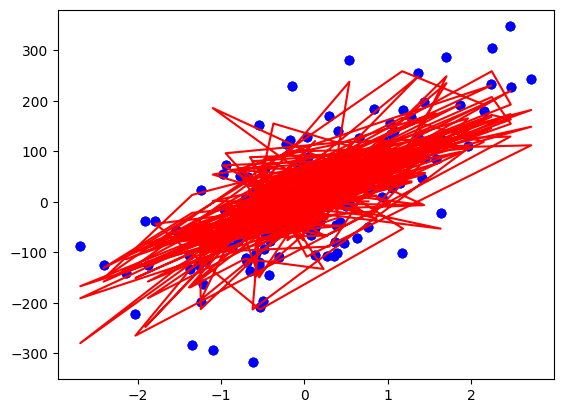

In [197]:
for model in models:
    model["estimator"].fit(X_train,y_train)
    y_pred=model["estimator"].predict(X_test)
    print(mean_squared_error(y_pred=y_pred,y_true=y_test))
    print(r2_score(y_pred=y_pred,y_true=y_test))
    plt.scatter(X_test[best_feature],y_test,color="blue")
    plt.plot(X_test[best_feature],y_pred,color="red")
    plt.show()
    

## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 

### Decision Tree and Random Forest regression
- Decision Tree and Random Forest have an RMSE slightly higher than multivariate linear regression



## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with other columns and comment the results